## <div align="center"> Assignment 4</div>
## <div align="center"> Machine Learning</div>
### <div align="center"> Group Assignment</div>


<br><div align="center"> By Group A3: </div>
<div align="center"> Jiaqi Chen, Yuxi Fu, Jiaxuan Lyu, Maria Tsotalou, Qian Zhang </div>

In [17]:
import pandas as pd
import numpy as np
import math 
from yellowbrick import KElbowVisualizer


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering


import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None 

import scipy.cluster.hierarchy as shc 

ImportError: cannot import name 'KElbowVisualizer' from 'yellowbrick' (D:\Anaconda\lib\site-packages\yellowbrick\__init__.py)

# Question 1

In [2]:
# Read the data set, normalise the gender column, drop the ID column(not necessary for cluster)
customer = pd.read_csv("customers.csv")
customer["Gender_binary"] = np.where(customer['Gender']=="Female", 1, 0)
customer.drop(['ID', 'Gender'], axis = 1, inplace=True)
customer

,Age,Income,Score,Gender_binary
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1
...,...,...,...,...
195,35,120,79,1
196,45,126,28,1
197,32,126,74,0
198,32,137,18,0


In [3]:
# Apply a Z-score normalisation on the numerical features (age, income and score)
def normalisation(input_data):
    data_normalised = preprocessing.scale(input_data) #Scaling the dataset
    data_normalised = pd.DataFrame(data=data_normalised,columns = list(input_data.columns))
    data_normalised['Gender_binary'] = input_data['Gender_binary']
    return data_normalised
customer_normalised= normalisation(customer)
customer_normalised.head()

,Age,Income,Score,Gender_binary
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,1
3,-1.137502,-1.700830,1.040418,1
4,-0.563369,-1.662660,-0.395980,1


# Question 2

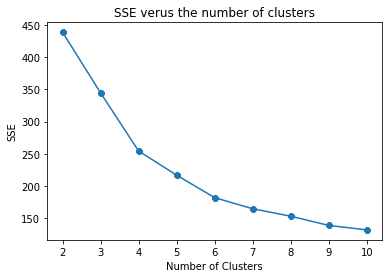

In [4]:
# Draw the plot of SSE verus the number of clusters
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customer_normalised)
    sse.append(kmeans.inertia_)

plt.plot(range(2,11),sse, marker ="8")
plt.title('SSE verus the number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [16]:
# Use elbow chart to find the best k.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised)      
visualizer.show()

NameError: name 'KElbowVisualizer' is not defined

#### Heuristics-Elbow chart: From the elbow method, the optimal k is k=5

# Question 3

In [8]:
# Cluster the samples (Age, Income, Score) using K-means with the best k.
km = KMeans(n_clusters=5)
customer_normalised_minus_gender = customer_normalised.drop(columns=['Gender_binary'])
clusters = km.fit_predict(customer_normalised)
customer["Label"] = clusters
customer

,Age,Income,Score,Gender_binary,Label
0,19,15,39,0,1
1,21,15,81,0,3
2,20,16,6,1,1
3,23,16,77,1,3
4,31,17,40,1,1
...,...,...,...,...,...
195,35,120,79,1,4
196,45,126,28,1,0
197,32,126,74,0,4
198,32,137,18,0,0


In [9]:
# Calculate the centroid of each cluster
clf = NearestCentroid()
x=customer.iloc[:,0:-2]
y=customer.Label
clf.fit(x, y)
centers = clf.centroids_
centers_x = centers[:,0]
centers_y = centers[:,1]
centers_z = centers[:,2]

centers

array([[41.26470588, 88.5       , 16.76470588],
       [27.95744681, 50.        , 44.63829787],
       [55.55172414, 48.48275862, 41.77586207],
       [25.27272727, 25.72727273, 79.36363636],
       [32.69230769, 86.53846154, 82.12820513]])

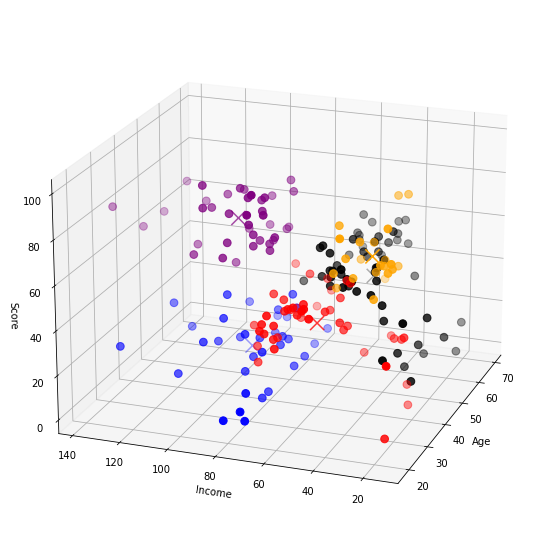

In [10]:
# Plot the clusters and centroids in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer.Age[customer.Label == 0], customer["Income"][customer.Label == 0], customer["Score"][customer.Label == 0], c='blue', s=60)
ax.scatter(customer.Age[customer.Label == 1], customer["Income"][customer.Label == 1], customer["Score"][customer.Label == 1], c='red', s=60)
ax.scatter(customer.Age[customer.Label == 2], customer["Income"][customer.Label == 2], customer["Score"][customer.Label == 2], c='black', s=60)
ax.scatter(customer.Age[customer.Label == 3], customer["Income"][customer.Label == 3], customer["Score"][customer.Label == 3], c='orange', s=60)
ax.scatter(customer.Age[customer.Label == 4], customer["Income"][customer.Label == 4], customer["Score"][customer.Label == 4], c='purple', s=60)
ax.scatter(centers_x,centers_y,centers_z,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax.view_init(20, 200)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Score')
plt.show()





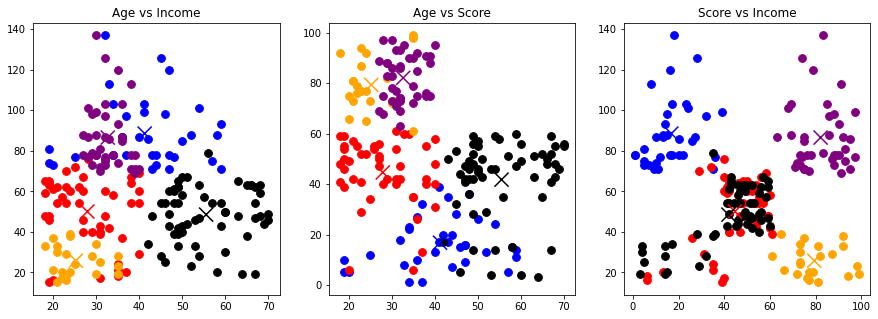

In [11]:
# Draw the clusters in three 2d plots
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("Age vs Income")
ax[0].scatter(customer.Age[customer.Label == 0], customer.Income[customer.Label == 0], c='blue', s=60)
ax[0].scatter(customer.Age[customer.Label == 1], customer.Income[customer.Label == 1], c='red', s=60)
ax[0].scatter(customer.Age[customer.Label == 2], customer.Income[customer.Label == 2], c='black', s=60)
ax[0].scatter(customer.Age[customer.Label == 3], customer.Income[customer.Label == 3], c='orange', s=60)
ax[0].scatter(customer.Age[customer.Label == 4], customer.Income[customer.Label == 4], c='purple', s=60)
ax[0].scatter(centers_x,centers_y,marker = "x",s=200,c=['blue','red','black','orange','purple'])

ax[1].set_title("Age vs Score")
ax[1].scatter(customer.Age[customer.Label == 0], customer.Score[customer.Label == 0], c='blue', s=60)
ax[1].scatter(customer.Age[customer.Label == 1], customer.Score[customer.Label == 1], c='red', s=60)
ax[1].scatter(customer.Age[customer.Label == 2], customer.Score[customer.Label == 2], c='black', s=60)
ax[1].scatter(customer.Age[customer.Label == 3], customer.Score[customer.Label == 3], c='orange', s=60)
ax[1].scatter(customer.Age[customer.Label == 4], customer.Score[customer.Label == 4], c='purple', s=60)
ax[1].scatter(centers_x,centers_z,marker = "x",s=200,c=['blue','red','black','orange','purple'])


ax[2].set_title("Score vs Income")
ax[2].scatter(customer.Score[customer.Label == 0], customer.Income[customer.Label == 0], c='blue', s=60)
ax[2].scatter(customer.Score[customer.Label == 1], customer.Income[customer.Label == 1], c='red', s=60)
ax[2].scatter(customer.Score[customer.Label == 2], customer.Income[customer.Label == 2], c='black', s=60)
ax[2].scatter(customer.Score[customer.Label == 3], customer.Income[customer.Label == 3], c='orange', s=60)
ax[2].scatter(customer.Score[customer.Label == 4], customer.Income[customer.Label == 4], c='purple', s=60)
ax[2].scatter(centers_z,centers_y,marker = "x",s=200,c=['blue','red','black','orange','purple'])

fig.tight_layout()

### Can you find any meaningful results? Can you identify customer segments?


Within 5 clusters, in general there is four type of group, people with high income and high score(red), high income and low score(black), low income but high score and last(purple), a group of people that high low to mid income and low to mid score, and their score&income are positive correlated (blue&yellow)

Red: low age, high income high score
Yellow: low age low income and low score
Blue: High age, low income and low score
Black: High income with variety of age and score
Red: low age, high income and low score




# Question 4

In [12]:
# Create three different datasets,(age,income), (age, score), (income, score).
customer_normalised_age_income = customer_normalised_minus_gender[['Age','Income']]
customer_normalised_score_income = customer_normalised_minus_gender[['Score','Income']]
customer_normalised_score_age = customer_normalised_minus_gender[['Score','Age']]

In [13]:
# Use elbow chart to find the best numbers of cluster for age and income.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_age_income)      
visualizer.show()

NameError: name 'KElbowVisualizer' is not defined

In [14]:
# Use elbow chart to find the best numbers of cluster for score and income.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_score_income)      
visualizer.show()

NameError: name 'KElbowVisualizer' is not defined

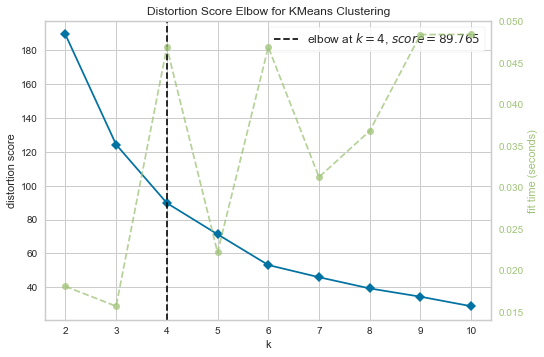

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
# Use elbow chart to find the best numbers of cluster for score and age.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(customer_normalised_score_age)      
visualizer.show()

In [22]:
best_k_age_income = 4
best_k_score_income = 5
best_k_score_age = 4

# Question 5

In [25]:
# Plot the clusters and distinguish the data points based on the 'Gender' categorical feature.
def return_customer_centroids(factors,n_clusters,customer_dataset = customer,customer_normalised_dataset=customer_normalised):
    customer_part = customer_dataset[factors]
    customer_normalised_part = customer_normalised[factors]
    km = KMeans(n_clusters)
    clusters = km.fit_predict(customer_normalised_part[factors[:2]])
    customer_part["Label"] = clusters
    customer_part_male = customer_part.loc[customer_part.Gender_binary == 0]
    customer_part_female = customer_part.loc[customer_part.Gender_binary == 1]
    return customer_part_male,customer_part_female

factors_Age_Income = ['Age','Income','Gender_binary']
factors_Score_Income = ['Score','Income','Gender_binary']
factors_Age_Score = ['Age','Score','Gender_binary']

customer_Age_Income_Male,customer_Age_Income_Female = return_customer_centroids(factors_Age_Income,best_k_age_income)
customer_Score_Income_Male,customer_Score_Income_Female = return_customer_centroids(factors_Score_Income,best_k_score_income)
customer_Age_Score_Male,customer_Age_Score_Female = return_customer_centroids(factors_Age_Score,best_k_score_age)

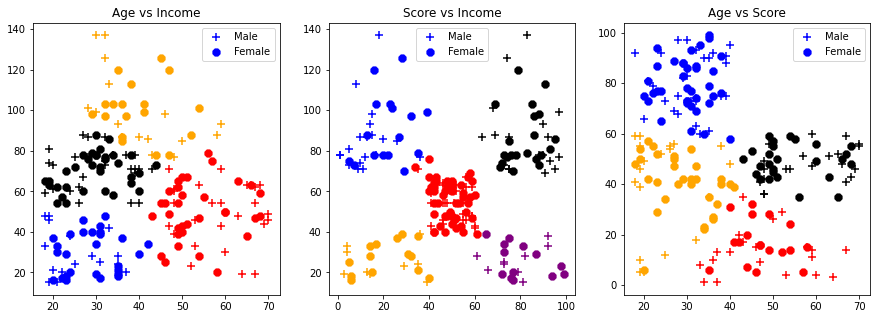

In [26]:
# Draw the clusters in three 2d plots
f, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].set_title("Age vs Income")
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.Label == 0], customer_Age_Income_Male.Income[customer_Age_Income_Male.Label == 0],marker ='+', c='blue', s=60, label='Male')
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.Label == 1], customer_Age_Income_Male.Income[customer_Age_Income_Male.Label == 1],marker ='+', c='red', s=60)
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.Label == 2], customer_Age_Income_Male.Income[customer_Age_Income_Male.Label == 2],marker ='+', c='black', s=60)
ax[0].scatter(customer_Age_Income_Male.Age[customer_Age_Income_Male.Label == 3], customer_Age_Income_Male.Income[customer_Age_Income_Male.Label == 3],marker ='+', c='orange', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.Label == 0], customer_Age_Income_Female.Income[customer_Age_Income_Female.Label == 0],marker ='8', c='blue', s=60,label='Female')
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.Label == 1], customer_Age_Income_Female.Income[customer_Age_Income_Female.Label == 1],marker ='8', c='red', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.Label == 2], customer_Age_Income_Female.Income[customer_Age_Income_Female.Label == 2],marker ='8', c='black', s=60)
ax[0].scatter(customer_Age_Income_Female.Age[customer_Age_Income_Female.Label == 3], customer_Age_Income_Female.Income[customer_Age_Income_Female.Label == 3],marker ='8', c='orange', s=60)
ax[0].legend()

ax[1].set_title("Score vs Income")
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.Label == 0], customer_Score_Income_Male.Income[customer_Score_Income_Male.Label == 0],marker ='+', c='blue', s=60, label='Male')
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.Label == 1], customer_Score_Income_Male.Income[customer_Score_Income_Male.Label == 1],marker ='+', c='red', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.Label == 2], customer_Score_Income_Male.Income[customer_Score_Income_Male.Label == 2],marker ='+', c='black', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.Label == 3], customer_Score_Income_Male.Income[customer_Score_Income_Male.Label == 3],marker ='+', c='orange', s=60)
ax[1].scatter(customer_Score_Income_Male.Score[customer_Score_Income_Male.Label == 4], customer_Score_Income_Male.Income[customer_Score_Income_Male.Label == 4],marker ='+', c='purple', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.Label == 0], customer_Score_Income_Female.Income[customer_Score_Income_Female.Label == 0],marker ='8', c='blue', s=60,label='Female')
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.Label == 1], customer_Score_Income_Female.Income[customer_Score_Income_Female.Label == 1],marker ='8', c='red', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.Label == 2], customer_Score_Income_Female.Income[customer_Score_Income_Female.Label == 2],marker ='8', c='black', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.Label == 3], customer_Score_Income_Female.Income[customer_Score_Income_Female.Label == 3],marker ='8', c='orange', s=60)
ax[1].scatter(customer_Score_Income_Female.Score[customer_Score_Income_Female.Label == 4], customer_Score_Income_Female.Income[customer_Score_Income_Female.Label == 4],marker ='8', c='purple', s=60)
ax[1].legend()

ax[2].set_title("Age vs Score")
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.Label == 0], customer_Age_Score_Male.Score[customer_Age_Score_Male.Label == 0],marker ='+', c='blue', s=60, label='Male')
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.Label == 1], customer_Age_Score_Male.Score[customer_Age_Score_Male.Label == 1],marker ='+', c='red', s=60)
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.Label == 2], customer_Age_Score_Male.Score[customer_Age_Score_Male.Label == 2],marker ='+', c='black', s=60)
ax[2].scatter(customer_Age_Score_Male.Age[customer_Age_Score_Male.Label == 3], customer_Age_Score_Male.Score[customer_Age_Score_Male.Label == 3],marker ='+', c='orange', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.Label == 0], customer_Age_Score_Female.Score[customer_Age_Score_Female.Label == 0],marker ='8', c='blue', s=60,label='Female')
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.Label == 1], customer_Age_Score_Female.Score[customer_Age_Score_Female.Label == 1],marker ='8', c='red', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.Label == 2], customer_Age_Score_Female.Score[customer_Age_Score_Female.Label == 2],marker ='8', c='black', s=60)
ax[2].scatter(customer_Age_Score_Female.Age[customer_Age_Score_Female.Label == 3], customer_Age_Score_Female.Score[customer_Age_Score_Female.Label == 3],marker ='8', c='orange', s=60)
ax[2].legend()

fig.tight_layout()

female and male are randomly assigned in all clusters except the yellow one.

i.e. for customer groups that in mid age, high income but low score has relatively more female than male.

# Question 6

In [17]:
customers_noisy = pd.read_csv("customers_noisy.csv")
customers_noisy

,Gender,Age,Income,Score,Noisy1,Noisy2,Noisy3,Noisy4
0,0,19,15,39,25,89,33,93
1,0,21,15,81,21,95,51,106
2,1,20,16,6,25,84,38,86
3,1,23,16,77,23,95,28,79
4,1,31,17,40,21,87,38,96
...,...,...,...,...,...,...,...,...
195,1,35,120,79,30,96,46,78
196,1,45,126,28,25,87,38,77
197,0,32,126,74,22,96,39,96
198,0,32,137,18,29,88,37,78


In [18]:
#plt.figure(figsize=(15, 10))  
#plt.title("Dendrogram")  

agg_clustering = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
x = customers_noisy
y_hc=agg_clustering.fit(x)

customers_noisy["Label"] = y_hc.labels_
customers_noisy
#dend = shc.dendrogram( shc.linkage(customers, method='complete') )

,Gender,Age,Income,Score,Noisy1,Noisy2,Noisy3,Noisy4,Label
0,0,19,15,39,25,89,33,93,4
1,0,21,15,81,21,95,51,106,3
2,1,20,16,6,25,84,38,86,4
3,1,23,16,77,23,95,28,79,3
4,1,31,17,40,21,87,38,96,4
...,...,...,...,...,...,...,...,...,...
195,1,35,120,79,30,96,46,78,1
196,1,45,126,28,25,87,38,77,2
197,0,32,126,74,22,96,39,96,1
198,0,32,137,18,29,88,37,78,2


In [19]:
# Calculate the centroid of each cluster
clf = NearestCentroid()
x=customers_noisy.iloc[:,0:-5]
y=customers_noisy.Label
clf.fit(x, y)
centers = clf.centroids_
centers_x = centers[:,0]
centers_y = centers[:,1]
centers_z = centers[:,2]

centers

array([[ 0.6043956 , 42.28571429, 54.45054945, 49.40659341],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.4375    , 41.        , 89.40625   , 15.59375   ],
       [ 0.55555556, 25.38888889, 24.        , 81.11111111],
       [ 0.6       , 43.9       , 24.45      , 19.1       ]])

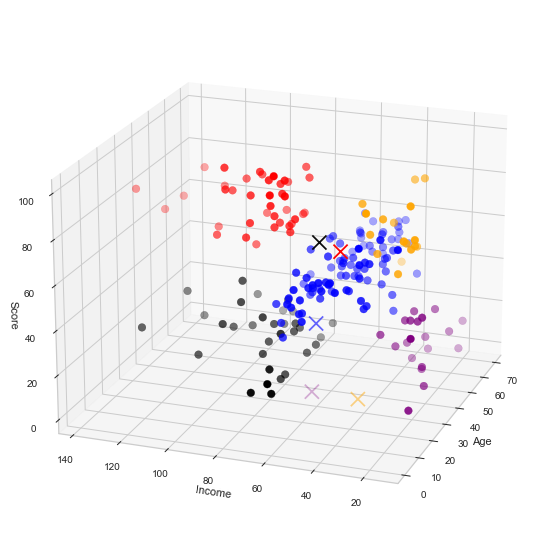

In [20]:
# Plot the clusters and centroids in 3D
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customers_noisy.Age[customers_noisy.Label == 0], customers_noisy["Income"][customers_noisy.Label == 0], customers_noisy["Score"][customers_noisy.Label == 0], c='blue', s=60)
ax.scatter(customers_noisy.Age[customers_noisy.Label == 1], customers_noisy["Income"][customers_noisy.Label == 1], customers_noisy["Score"][customers_noisy.Label == 1], c='red', s=60)
ax.scatter(customers_noisy.Age[customers_noisy.Label == 2], customers_noisy["Income"][customers_noisy.Label == 2], customers_noisy["Score"][customers_noisy.Label == 2], c='black', s=60)
ax.scatter(customers_noisy.Age[customers_noisy.Label == 3], customers_noisy["Income"][customers_noisy.Label == 3], customers_noisy["Score"][customers_noisy.Label == 3], c='orange', s=60)
ax.scatter(customers_noisy.Age[customers_noisy.Label == 4], customers_noisy["Income"][customers_noisy.Label == 4], customers_noisy["Score"][customers_noisy.Label == 4], c='purple', s=60)
ax.scatter(centers_x,centers_y,centers_z,marker = "x",s=200,c=['blue','red','black','orange','purple'])
ax.view_init(20, 200)
plt.xlabel("Age")
plt.ylabel("Income")
ax.set_zlabel('Score')
plt.show()

The non-noisy dataset thend to have a more clear boundry compare with the noisy dataset.
As such, we can easily see the regions claimed by each of the cluster in the non-noisy method.
In addition, the cluster center of the noisy dataset is more sensitive to outliers. 